# Principal Components Analysis
#### PCA is a simple yet popular and useful linear transform

In [5]:
# PCA used to identify patterns in data, aims to detect correlation b/w variables
# If strong correlation, reduce dimensionality
# find the directions of maximum variance in high dimensional data and project onto a smaller
# dimensional subspace while retaining most information

# PCA yields directions (principal components) that max out the variance of the data
# LDA also aims to find the directions that separate or discriminate data 
# but also between different classes, useful for pattern classification
# PCA ignores class labels

# PCA projects entire dataset onto a different feature subspace
# LDA tries to determine suitable feature subspace in order to distinguish between patterns
# belonging to different classes

# reduce d-dimensional dataset by projecting it onto a k-dimensional subspace
# where k < d in order to increase computational efficiency while retaining most of the information
# question is: what is the size of k that represents the data well?

# collect eigenvectors (principal components) of a dataset in a projection matrix 
# each eigenvector has an associated eignvalue (scalar) which can be interpreted as the length or magnitude of variance
# larger eigenvalues means the vector explains more variance
# the eigenvalue represents the weights formed from a linear combination of attributes

## PCA Approach Summary
##### Standardize Data
##### Obtain Eigenvectors and Eigenvalues from covariance/correlation matrix or perform Singular Vector Decomposition
##### Sort eigenvalues in descending order and choose the k eigenvectors that correspond to k largest eigenvalues
##### Construct the projection matrix W from the selected k eigenvectors
##### Transform the original dataset **X** via **W** to obtain a k dimensional feature subspace **Y**

In [106]:
import pandas as pd
%matplotlib inline 

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.dropna(how = "all", inplace=True) # drops the empty line at file-end

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
# split data table into data X and class labels Y
X = df.ix[:,0:4].values # 150x4 matrix, each row is a 4 dimensional vector
y = df.ix[:4].values

X.shape

(150, 4)

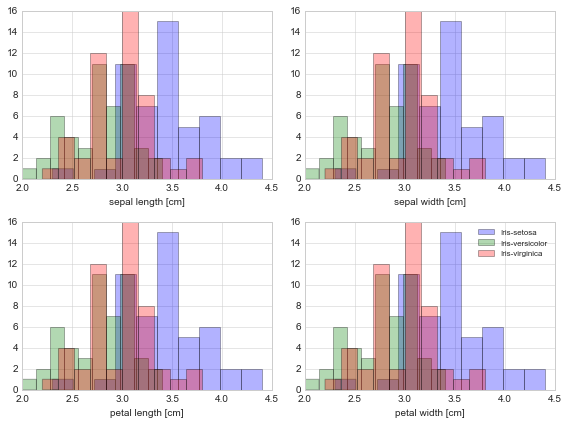

In [80]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(df[df['class'] == lab].ix[:,1],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [83]:
# now lets standardize, most of the time it is best to standardize
# before using algorithms, PCA yields a feature subspace that maximizes the variance along the axes

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

## Eigendecomposition - Computing Eigenvectors and Eigenvalues

In [86]:
# these are the core of PCA, eigenvectors determine the new directions of the feature space
# and eigenvalues determine their magnitude
# usually use the covariance matrix which is a dxd (dimension by dimension) matrix which represents 
# the covariance between two features
# mean vector is a d dimensional vector where each value in this vector represents the sample mean of a feature
# in the dataset
import numpy as np
mean_vec = np.mean(X_std, axis = 0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print mean_vec
print X_std.shape
print cov_mat

[ -4.73695157e-16  -6.63173220e-16   3.31586610e-16  -2.84217094e-16]
(150, 4)
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [132]:
# next we perform eigendecomposition on the matrix
cov_mat = np.cov(X_std.T)
print cov_mat
# find the eigenvectors and eigenvalues of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print 'covariance matrix shape', cov_mat.shape
print 'eigenvalues:', eig_vals
# eigenvectors are the columns here, full vector space will be same size as covariance matrix
print 'eigenvectors:\n', eig_vecs
eig_vecs.shape

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
covariance matrix shape (4, 4)
eigenvalues: [ 2.93035378  0.92740362  0.14834223  0.02074601]
eigenvectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


(4, 4)

In [135]:
# lets also calculate eigenvalues and eigenvectors with the correlation matrix
# if covariance is standardized, the two methods have the same result

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [138]:
# lets also calculate the correlation coefficient matrix on the raw data
# to prove that this is the same

cor_mat2 = np.corrcoef(X.T) # non standardized data matrix

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[ 2.91081808  0.92122093  0.14735328  0.02060771]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [139]:
# and also an SVD
u, s, v = np.linalg.svd(X_std.T) # must pass the transpose
print u
print s

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[ 20.89551896  11.75513248   4.7013819    1.75816839]


# SELECTING PRINCIPAL COMPONENTS

In [89]:
# The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it 
# onto a smaller subspace, where the eigenvectors will form the axes. 
# However, the eigenvectors only define the directions of the new axis, 
# since they have all the same unit length 1, 
# which can confirmed by the following two lines of code:

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [144]:
# In order to decide which eigenvector(s) 
# can be dropped without losing too much information for the construction of lower-dimensional subspace, 
# we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the 
# least information about the distribution of the data -- those are the ones that can be dropped.
# In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose 
# the top k eigenvectors.

# Make a list of (eigenvalue, eigenvector) tuples, the eigenvectors are the columns in row arrays, requires some
# indexing
# create a list of tuples: 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print('Eigenvalue:', i[0], 'Eigenvector', i[1])

Eigenvalues in descending order:
('Eigenvalue:', 2.910818083752051, 'Eigenvector', array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
('Eigenvalue:', 0.92122093070722411, 'Eigenvector', array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))
('Eigenvalue:', 0.14735327830509559, 'Eigenvector', array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))
('Eigenvalue:', 0.020607707235625265, 'Eigenvector', array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))


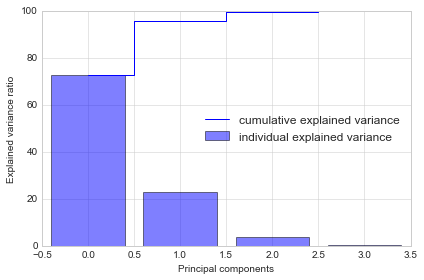

In [154]:
# After sorting the eigenpairs, the next question is “how many principal components are we going to choose 
# for our new feature subspace?” A useful measure is the “explained variance,” which can be 
# calculated from the eigenvalues. The explained variance tells us how much information (variance) can 
# be attributed to each of the principal components.

tot = sum(eig_vals) # get the sum of all of the eigenvalues (there should be # dimensions eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] # for each eigenvalue, divide it by total
# store in list with list comprehension
cum_var_exp = np.cumsum(var_exp) # get the cumulative sum in an array

# plot it
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center', # for each value in var_exp, plot it
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid', # create a simple step for each cumulative sum
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
    # we can use two PCs here instead of all 4 from covariance matrix

(4, 1)

## Projection Matrix

In [98]:
# The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. 
# Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated 
# top k eigenvectors.

# Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, 
# by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional 
# eigenvector matrix W.
# here we choose TWO eigenvectors that explain most variance
# in any data transform with PCA  data matrix D = rows x columns 
# the ROWS of the projection matrix will need to be the same # of columns (as rows) by # of vectors
# in this case 150 x 4 will be projected to 4 x 2 and result in a 150 x 2 transformed data matrix
# where the eigenvectors are weights * the original data values

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
# horizontally stack the new column vectors after reshaping them
print 'Matrix W:\n', matrix_w
matrix_w.shape
eig_pairs[0][1]

Matrix W:
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [44]:
# In this last step we will use the 4×2-dimensional projection matrix W to transform our samples 
# this projection matrix represents the first two eigenvectors that explain the most variance in data
# from the covariance matrix above
# onto the new subspace via the equation
# Y = X×W  where Y is a 150×2 matrix of our transformed samples.

In [161]:
# this is the dot product of the original, standardized data set * the projection matrix formed by eigenvectors above
Y = X_std.dot(matrix_w)
df['PCA1'] = Y[:,0]
df['PCA2'] = Y[:,1]
df[df['class'] =='Iris-setosa']

,sepal_len,sepal_wid,petal_len,petal_wid,class,PCA1,PCA2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.264542,-0.505704
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.086426,0.655405
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.367950,0.318477
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.304197,0.575368
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.388777,-0.674767
5,5.4,3.9,1.7,0.4,Iris-setosa,-2.070537,-1.518549
6,4.6,3.4,1.4,0.3,Iris-setosa,-2.445711,-0.074563
7,5.0,3.4,1.5,0.2,Iris-setosa,-2.233842,-0.247614
8,4.4,2.9,1.4,0.2,Iris-setosa,-2.341958,1.095146
9,4.9,3.1,1.5,0.1,Iris-setosa,-2.188676,0.448629


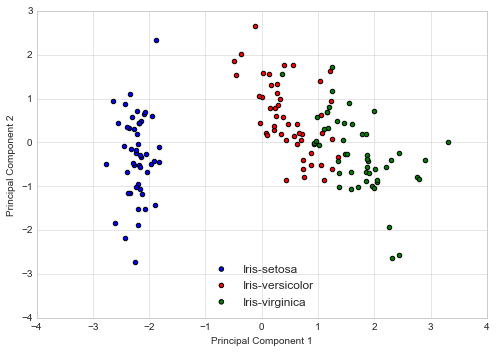

In [162]:
# all we did here was take the dot product of a 150x4 matrix and a 4 * 2 matrix of
# column eigenvectors, which gives us a projection or transformation of
# 150 * 2 matrix
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7, 5))
    # this loop is used to ID categories and color each category respectively
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(df[df['class'] == lab]['PCA1'],
                    df[df['class'] == lab]['PCA2'],
                    label = lab,
                    c = col )
    # matplotlib, you can create multiple plots for one figure, even on same
    # cartesian plane or multi-dimensional plane
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [163]:
# here is the shortcut using sklearn:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [164]:
df['PCA1'] = Y_sklearn[:,0]
df['PCA2'] = Y_sklearn[:,1]

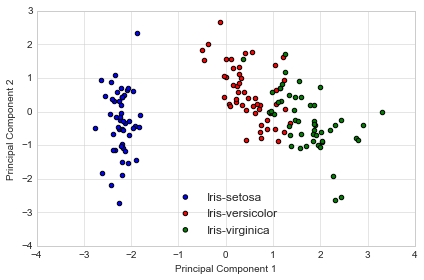

In [165]:
# all we did here was take the dot product of a 150x4 matrix and a 4 * 2 matrix of
# column eigenvectors, which gives us a projection or transformation of
# 150 * 2 matrix
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(df[df['class'] == lab]['PCA1'],
                    df[df['class'] == lab]['PCA2'],
                    label = lab,
                    c = col )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()